# Business Understanding


This Los Angelas crime dataset was supplied by LA County. It uses uniform crime reporting (UCR) created by the FBI to summarize incident info in a repeatable and comparable way to other cities, counties, and states.  

(WHAT VARIABLE WE CARE ABOUT)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
df = pd.read_csv("Data/Crime_Data_from_2010_to_2019.csv") 

# Data Meaning Type

In [52]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

# Data Quality

There are 898 crimes without a location noted

In [53]:
emptyLATLON =  sum(df['LON']==0)
emptyLATLON

898

To better plot, we could setting these to mean points.

In [34]:


#34.06377 	-118.3088

NameError: name 'gdp' is not defined

# Simple Statistics

In [54]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115280e+06,710470.000000,2.115323e+06,139402.000000,3499.000000,104.000000,2.115333e+06,2.115333e+06
mean,1.479209e+08,1.359865e+03,1.108682e+01,1.155070e+03,1.446029e+00,5.073349e+02,3.176409e+01,3.111814e+02,371.371934,5.071590e+02,949.996428,972.210346,975.105769,3.406377e+01,-1.183088e+02
std,2.887068e+07,6.470967e+02,6.012440e+00,6.012589e+02,4.970787e-01,2.106272e+02,2.064750e+01,2.113121e+02,113.469024,2.104900e+02,125.680743,85.516627,81.276338,7.115120e-01,2.440446e+00
min,1.208575e+06,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214242e+08,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401050e+01,-1.184364e+02
50%,1.508087e+08,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.715119e+08,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


 Victim Age appears to be highest in the twenties and goes down from there.
 0 - may be no age given check for NaN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15000ca90>]],
      dtype=object)

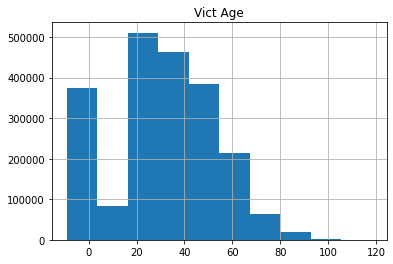

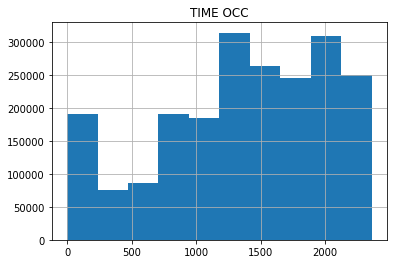

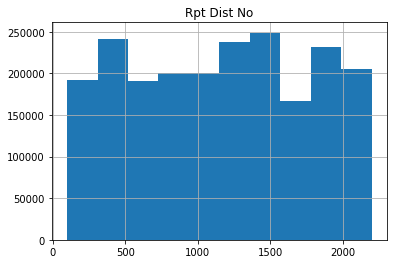

In [55]:
df.hist(column='Vict Age')
df.hist(column='TIME OCC')
df.hist(column='Rpt Dist No')


# Visualize Attributes

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [47]:


#create a geopandas dataframe and convert lat/long to point geometry:
geometry = [Point(xy) for xy in zip(df["LON"], df["LAT"])]
geometry[:3]

In [66]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

/Users/juliacodes/Documents/GitHub/MSDS-ML1-VisualizationAndDataProcessing/Julia/lacrime-env/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,geometry
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,POINT (-118.26950 33.98250)
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,POINT (-118.39620 33.95990)
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,POINT (-118.25240 34.02240)
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,POINT (-118.32950 34.10160)
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,POINT (-118.24880 34.03870)


In [67]:
geo_400 = geo_df[geo_df['TIME OCC'] == 400].describe()
geo_400 = geo_400[geo_df['LAT'] != 0].describe()

/Users/juliacodes/Documents/GitHub/MSDS-ML1-VisualizationAndDataProcessing/Julia/lacrime-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

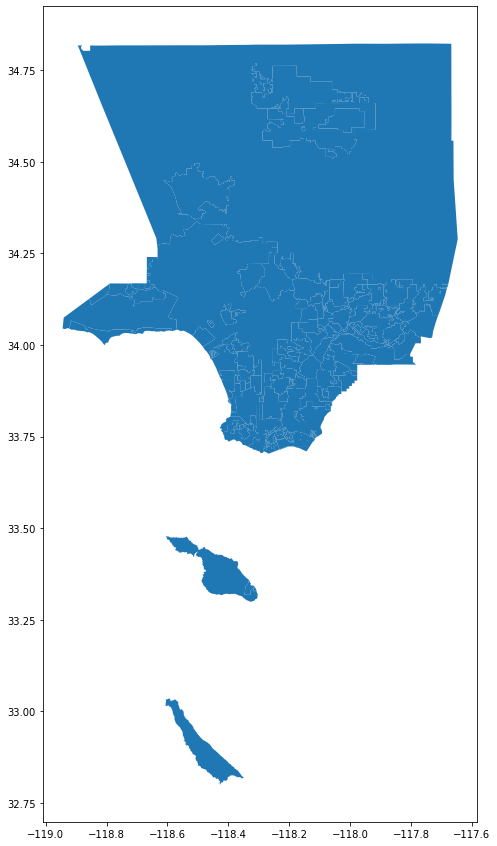

In [43]:
la_map = gpd.read_file('Data/shape/City_Boundaries.shp')
fig,ax = plt.subplots(figsize=(15,15))
la_map.plot(ax=ax)

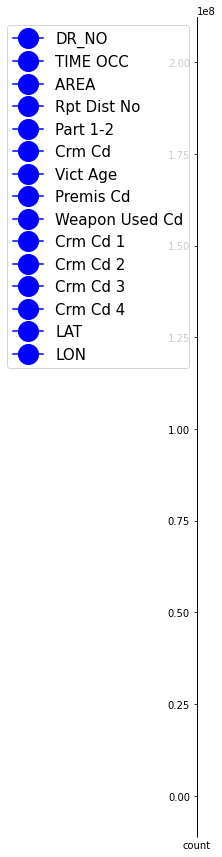

In [64]:
fig,ax = plt.subplots(figsize = (15,15))
la_map.plot(ax= ax, alpha = 0.4, color = "grey")
geo_df.plot(ax = ax, markersize = 20, color = "blue", marker = 'o', label = 'Crime')
plt.legend(prop={'size':15})

# Explore Joint Attributes

TypeError: 'int' object is not iterable

# Explore Attributes and Class

# New Features
Ages bucketed


In [4]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacity.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("63jg-8b9z", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,status_desc,crm_cd_1,location,lat,lon,cross_street,weapon_used_cd,weapon_desc,crm_cd_2,crm_cd_3
0,001307355,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900,300 E GAGE AV,33.9825,-118.2695,NaN,NaN,NaN,NaN,NaN
1,011401303,2010-09-13T00:00:00.000,2010-09-12T00:00:00.000,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740,SEPULVEDA BL,33.9599,-118.3962,MANCHESTER AV,NaN,NaN,NaN,NaN
2,070309629,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946,1300 E 21ST ST,34.0224,-118.2524,NaN,NaN,NaN,NaN,NaN
3,090631215,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,0150,06,Hollywood,0646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900,CAHUENGA BL,34.1016,-118.3295,HOLLYWOOD BL,102,HAND GUN,998,NaN
4,100100501,2010-01-03T00:00:00.000,2010-01-02T00:00:00.000,2100,01,Central,0176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122,8TH ST,34.0387,-118.2488,SAN PEDRO ST,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN
